Alyssa P. Hacker owns a pet robotic snail with an FSM brain. The snail crawls from left to right along a paper tape containing a sequence of 1's and 0's. On each clock cycle, the snail crawls to the next bit. The snail smiles when the last two bits that it has crawled over are 01.

![alt text](https://ars.els-cdn.com/content/image/3-s2.0-B9780128000564000030-f03-m02-9780128000564.jpg "Snail with an FSM brain")

Design the FSM to compute when the snail should smile.

![alt text](https://ars.els-cdn.com/content/image/3-s2.0-B9780128000564000030-f03-30-9780128000564.jpg "(a) Moore machine, (b) Mealy machine")

Figure 3.30. FSM state transition diagrams: (a) Moore machine, (b) Mealy machine

[__H & H Section 3.4.3__](https://dl.acm.org/doi/pdf/10.5555/2815529)

In [1]:
import os, sys
from pathlib import Path
PARENT_DIR = Path(os.getcwd()).resolve().parent
sys.path += [str(PARENT_DIR.joinpath('SciPyFST'))]
from SciPyFST import SciPyFST as FST
import graphviz, wavedrom
from IPython.display import display, Markdown

Create Moore FST

In [2]:
# snail with an Moore FSM brain
initStateMoore = 'S0'
# transitionFunction [ [State, inAlphabet, nextState], ...]
transitionFunctionMoore = [ ['S0',0,'S1'], ['S0',1,'S0'], ['S1',0,'S1'], ['S1',1,'S2'], ['S2',0,'S1'], ['S2',1,'S0'] ]
# outputFunction Moore [ [State, outAlphabet], ...]
outputFunctionMoore = [ ['S0',0], ['S1',0], ['S2',1] ]
# short form
brainMoore = FST([], initStateMoore, [], [], transitionFunctionMoore, outputFunctionMoore)

Visualise FST

| Input \ State | S0 / 0 | S1 / 0 | S2 / 1 |
|:---:|:---:|:---:|:---:|
| 0 | S1 | S1 | S1 |
| 1 | S0 | S2 | S0 |


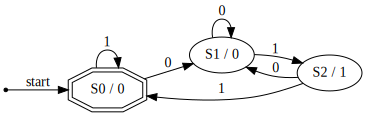

In [3]:
display(Markdown(brainMoore.toMdTable()))
graphviz.Source(brainMoore.toDot())

Play FST

In [4]:
inSignals = [0,1,0,0,1,1,0,1,1,1,0,1,0,1,0,1,0,1]
outSignals, outStates = brainMoore.playFST(inSignals)
print("             brainMoore.playFST(inSignals)")
print(" inSignals - " + str(inSignals))
print("    States - " + str(outStates))
print("outSignals - " + str(outSignals))

             brainMoore.playFST(inSignals)
 inSignals - [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
    States - ['S0', 'S1', 'S2', 'S1', 'S1', 'S2', 'S0', 'S1', 'S2', 'S0', 'S0', 'S1', 'S2', 'S1', 'S2', 'S1', 'S2', 'S1']
outSignals - [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]


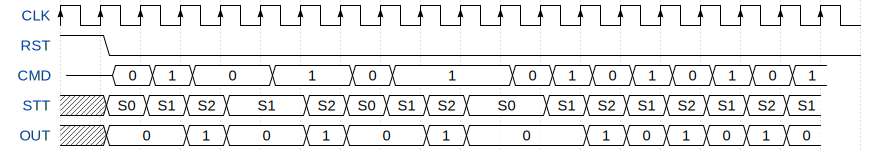

In [5]:
wavedrom.render(brainMoore.playToWave(inSignals))

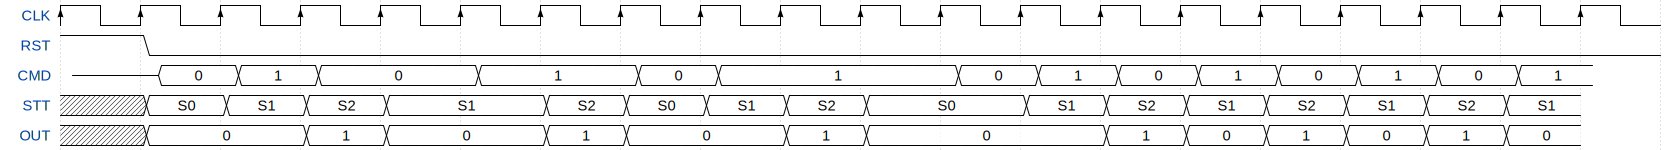

In [6]:
# Scale
wavedrom.render(brainMoore.playToWave(inSignals,2))

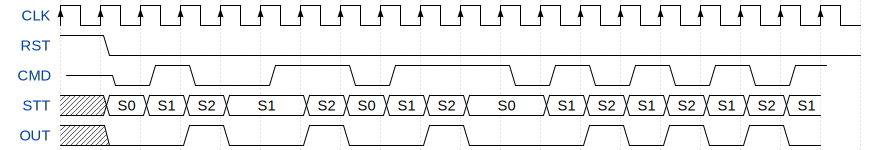

In [7]:
# 0 and 1 as logic signal
wavedrom.render(brainMoore.playToWave(inSignals,1,True))

In [8]:
# snail with an Mealy FSM brain
initStateMealy = 'S0'
# transitionFunction [ [State, inAlphabet, nextState], ...]
transitionFunctionMealy = [ ['S0',0,'S1'], ['S0',1,'S0'], ['S1',0,'S1'], ['S1',1,'S0'] ]
# outputFunction Mealy [ [State, inAlphabet, outAlphabet], ...]
outputFunctionMealy = [ ['S0',0,0], ['S0',1,0], ['S1',0,0], ['S1',1,1]]
# short form
brainMealy = FST([], initStateMealy, [], [], transitionFunctionMealy, outputFunctionMealy)

| Input \ State | S0 | S1 |
|:---:|:---:|:---:|
| 0 | S1 / 0 | S1 / 0 |
| 1 | S0 / 0 | S0 / 1 |


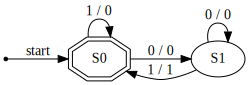

In [9]:
# Visualise FST
display(Markdown(brainMealy.toMdTable()))
graphviz.Source(brainMealy.toDot())

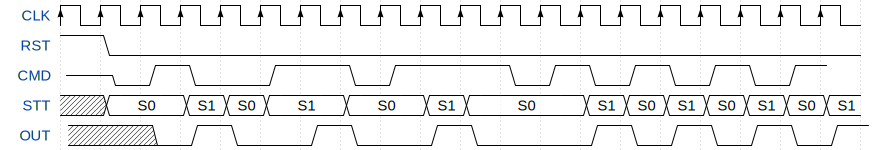

In [10]:
wavedrom.render(brainMealy.playToWave(inSignals,1,1))

TODO: phase shift

![alt text](https://ars.els-cdn.com/content/image/3-s2.0-B9780128000564000030-f03-32-9780128000564.jpg "Figure 3.32. Timing diagrams for Moore and Mealy machines")

Figure 3.32. Timing diagrams for Moore and Mealy machines
